#  Matplotlib

In [1]:
import numpy as np
import pandas as pd  # To import data as DataFrame. Pandas is built on NumPy so you need that as well.
import matplotlib.pyplot as plt # For plotting

In [2]:
pwd

'/content'

In [3]:
df = pd.read_csv('Piece_Dim.csv', index_col='Item_No')

In [4]:
df.head()

,Length,Width,Height,Operator
Item_No,,,,
Item-1,102.67,49.53,19.69,Op-1
Item-2,102.50,51.42,19.63,Op-1
Item-3,95.37,52.25,21.51,Op-1
Item-4,94.77,49.24,18.60,Op-1
Item-5,104.26,47.90,19.46,Op-1


In [5]:
df.describe()

,Length,Width,Height
count,50.000000,50.000000,50.000000
mean,100.128800,49.461400,20.014000
std,5.075593,2.615639,1.074069
min,89.820000,44.460000,17.370000
25%,95.675000,48.105000,19.375000
50%,99.830000,49.315000,19.930000
75%,104.402500,50.780000,20.595000
max,110.540000,55.760000,23.110000


## Histogram

(array([2., 3., 9., 6., 6., 7., 4., 6., 5., 2.]),
 array([ 89.82 ,  91.892,  93.964,  96.036,  98.108, 100.18 , 102.252,
        104.324, 106.396, 108.468, 110.54 ]),
 <BarContainer object of 10 artists>)

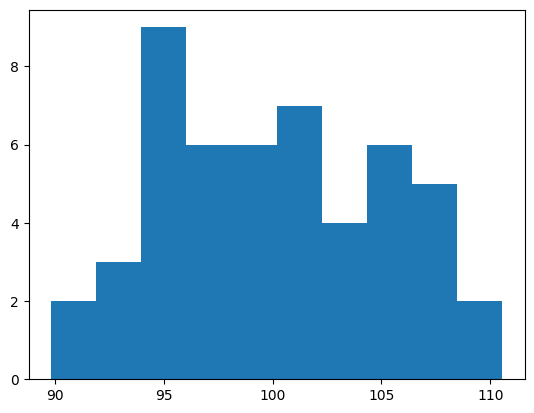

In [6]:
plt.hist(df['Length'])  # 10 bins by default

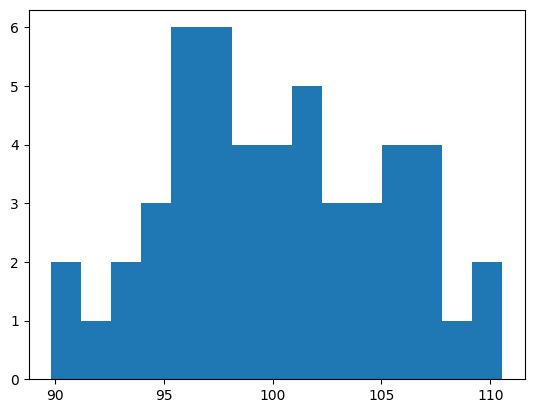

In [7]:
plt.hist(df['Length'], bins=15)
plt.show()

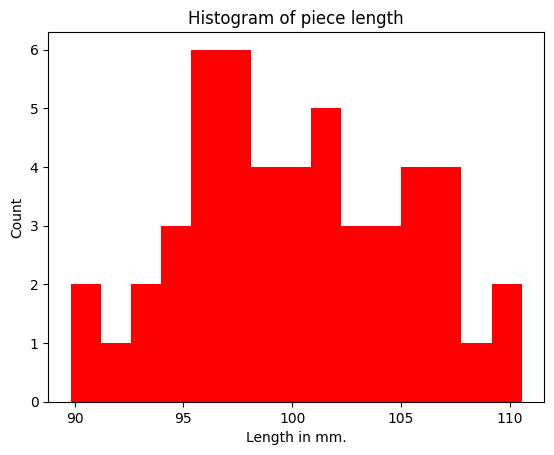

In [8]:
plt.hist(df['Length'], bins=15, color='Red')              # https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html
plt.xlabel("Length in mm.")
plt.ylabel("Count")
plt.title("Histogram of piece length")
plt.show()

## Box and Whisker Plot

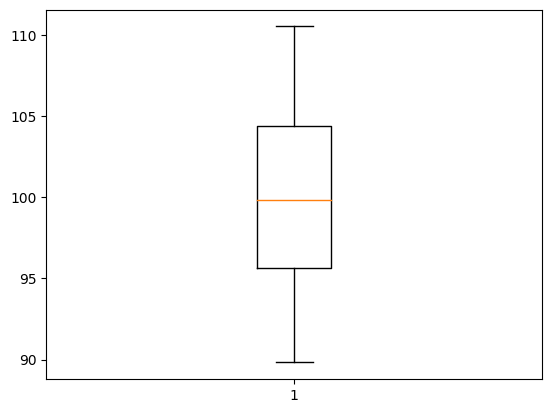

In [9]:
plt.boxplot(df['Length'])
plt.show()

In [10]:
op1 = df[df['Operator']=='Op-1']
op2 = df[df['Operator']=='Op-2']

In [11]:
op2.head()

,Length,Width,Height,Operator
Item_No,,,,
Item-26,95.69,49.48,17.37,Op-2
Item-27,105.88,49.53,18.70,Op-2
Item-28,101.68,52.79,19.42,Op-2
Item-29,93.54,51.05,19.29,Op-2
Item-30,99.66,48.40,20.64,Op-2


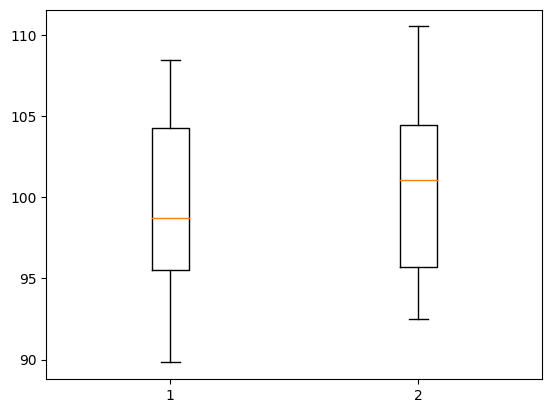

In [12]:
plt.boxplot([op1['Length'], op2['Length']])
plt.show()

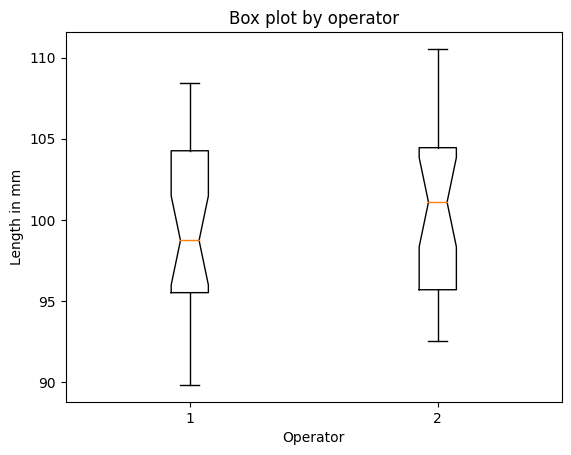

In [13]:
plt.boxplot([op1['Length'], op2['Length']], notch=True)
plt.xlabel('Operator')
plt.ylabel('Length in mm')
plt.title('Box plot by operator')
plt.show()


### Line Plot

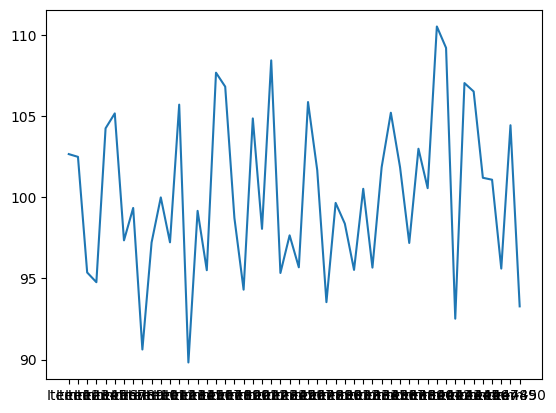

In [14]:
plt.plot(df['Length'])
plt.show()

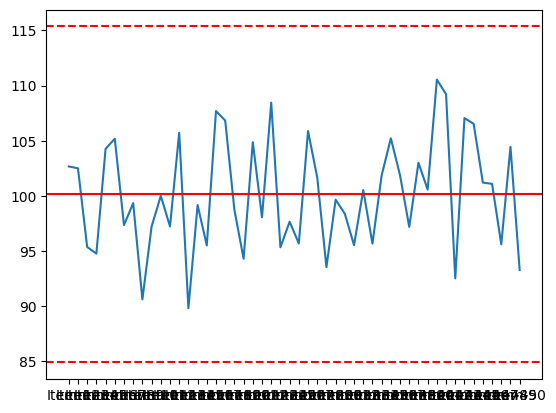

In [15]:
plt.plot(df['Length'])
mean_l = df['Length'].mean()
sd_l = df['Length'].std()
plt.axhline(y=mean_l, color='red', linestyle='-')
plt.axhline(y=(mean_l + 3*sd_l), color='red', linestyle='--')
plt.axhline(y=(mean_l - 3*sd_l), color='red', linestyle='--')
plt.show()

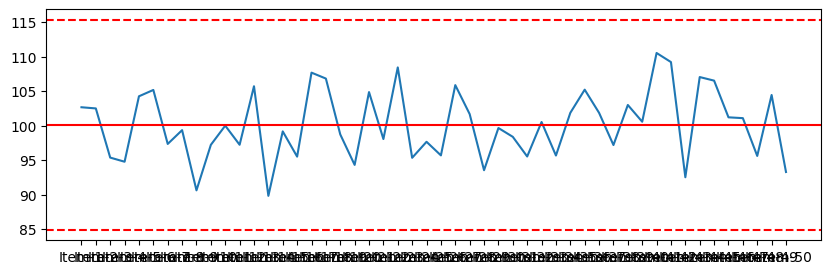

In [16]:
plt.figure(figsize=(10,3)) # Not covered in the video- To change the figure size
plt.plot(df['Length'])
mean_l = df['Length'].mean()
sd_l = df['Length'].std()
plt.axhline(y=mean_l, color='red', linestyle='-')
plt.axhline(y=(mean_l + 3*sd_l), color='red', linestyle='--')
plt.axhline(y=(mean_l - 3*sd_l), color='red', linestyle='--')
plt.show()

### Scatter Plot

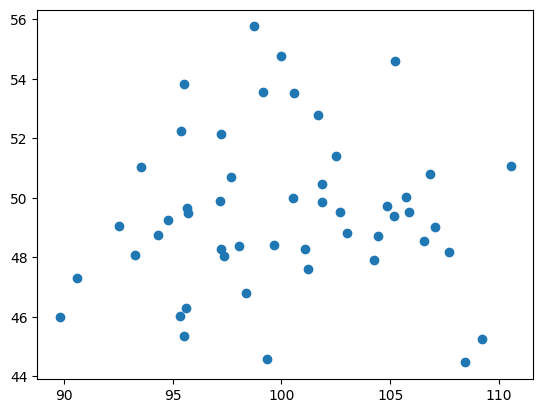

In [17]:
plt.scatter(df['Length'], df['Width'])

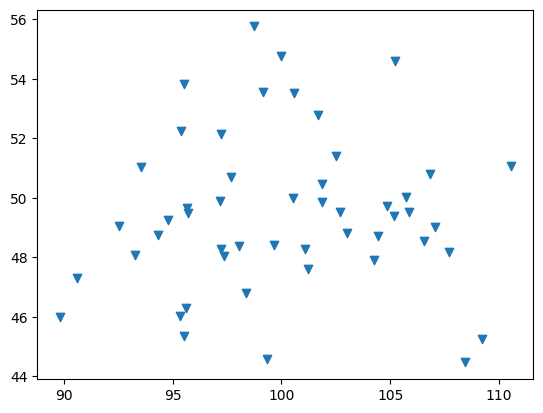

In [18]:
plt.scatter(data=df, x= 'Length', y='Width', marker='v');

### Bar Plot

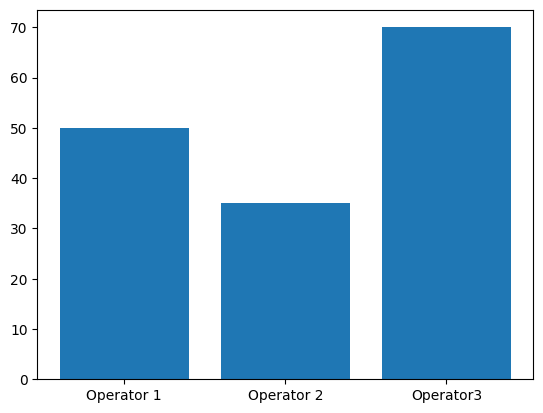

In [19]:
opers = ['Operator 1', 'Operator 2', 'Operator3']
pieces = [50, 35, 70]
plt.bar(opers, pieces)
plt.show()

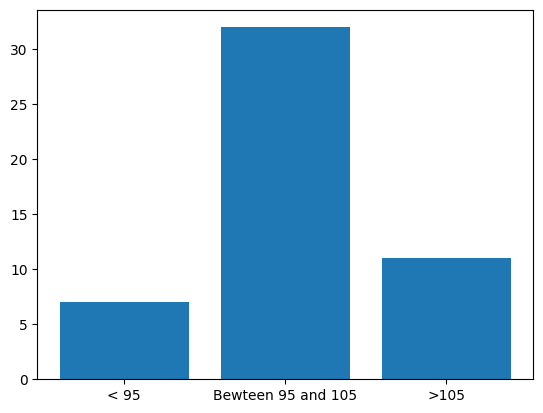

In [20]:
lowl = df[df['Length']<95]['Length'].count()
medl = df[(df['Length']>=95) & (df['Length']<=105)]['Length'].count()
higl = df[df['Length']>105]['Length'].count()

sizel = [lowl, medl, higl]
groupl = ['< 95', 'Bewteen 95 and 105', '>105']
plt.bar(groupl, sizel)
plt.show()

### Saving the Plot

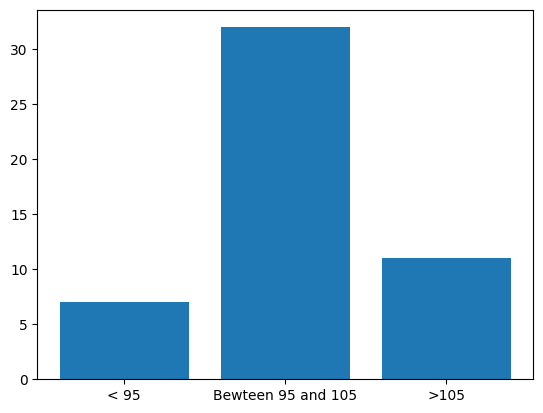

In [21]:
plt.bar(groupl, sizel)
plt.savefig('MyBoxPlot.jpg')

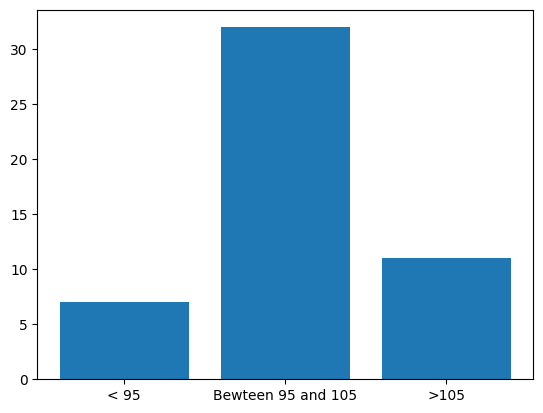

In [22]:
plt.bar(groupl, sizel)
plt.savefig('MyBoxPlot300.jpg', dpi=300)

In [23]:
ls

MyBoxPlot300.jpg  MyBoxPlot.jpg  Piece_Dim.csv  sample_data/


# Seaborn

- Statistical visualization library based on Matplotlib

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('Piece_Dim.csv')

In [27]:
df.head()

,Item_No,Length,Width,Height,Operator
0,Item-1,102.67,49.53,19.69,Op-1
1,Item-2,102.50,51.42,19.63,Op-1
2,Item-3,95.37,52.25,21.51,Op-1
3,Item-4,94.77,49.24,18.60,Op-1
4,Item-5,104.26,47.90,19.46,Op-1


## displot() Group of Plots

## Histogram

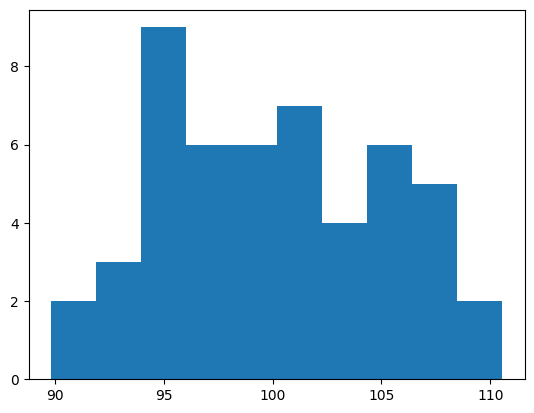

In [28]:
plt.hist(df['Length']);    #Histogram using Matplotlib (that we learnt earlier)

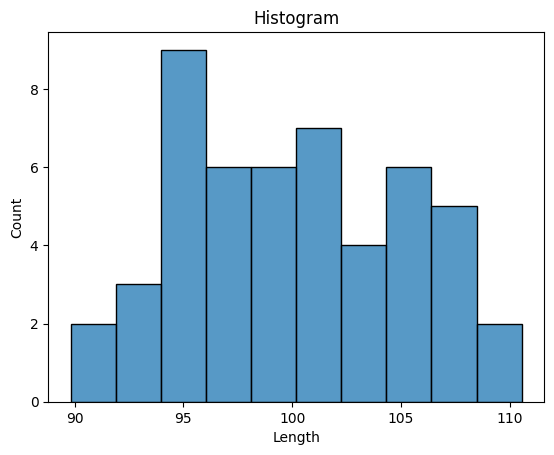

In [29]:
sns.histplot(data=df, x='Length', bins=10)
plt.title('Histogram')
plt.show()

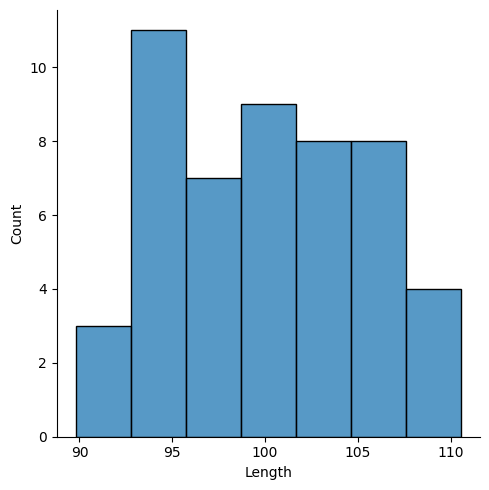

In [30]:
sns.displot(data=df, x='Length');
#displot (distribution plots)// distplot deprecated
# It is a combination of histplot, kdeplot, rugplot and ecdfplot.
# It is defined by kind = hist(default), kde, rug or ecdf

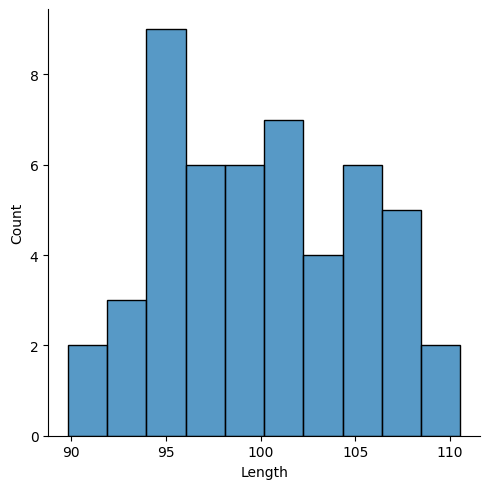

In [31]:
sns.displot(data=df, x='Length', bins=10);
#See that it is displot (or histplot)
# and not distplot (which will be removed in future versions)

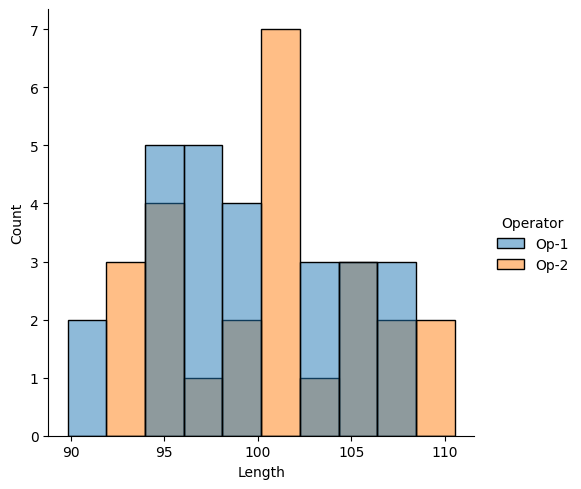

In [32]:
sns.displot(data=df, x='Length', bins=10, hue='Operator');
# Does not give a very good picture for the data here

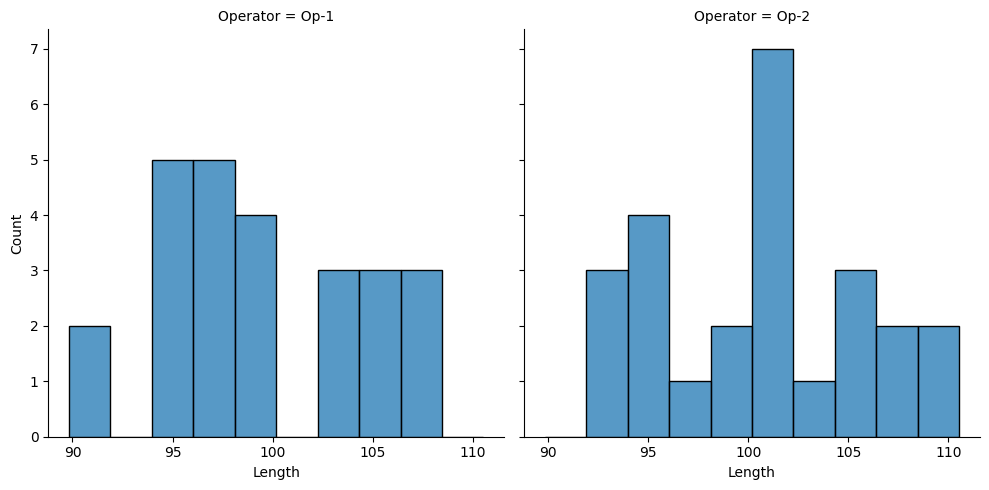

In [33]:
sns.displot(data=df, x='Length', bins=10, col='Operator')
plt.show()

### KDE Plot (Kernel Density Estimate)

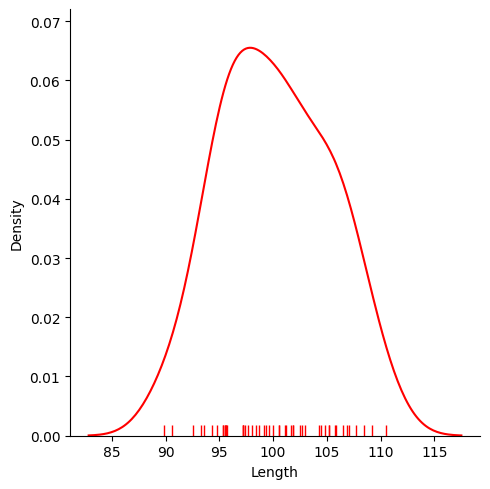

In [34]:
sns.displot(data=df, x='Length', rug=True, color='Red', kind='kde');

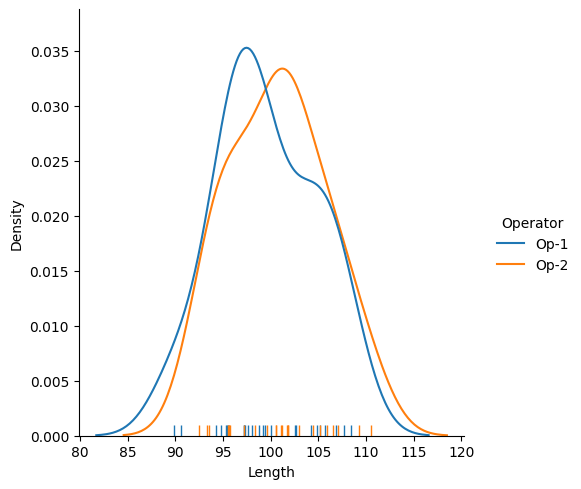

In [35]:
sns.displot(data=df, x='Length', rug=True, color='Red', kind='kde', hue='Operator');

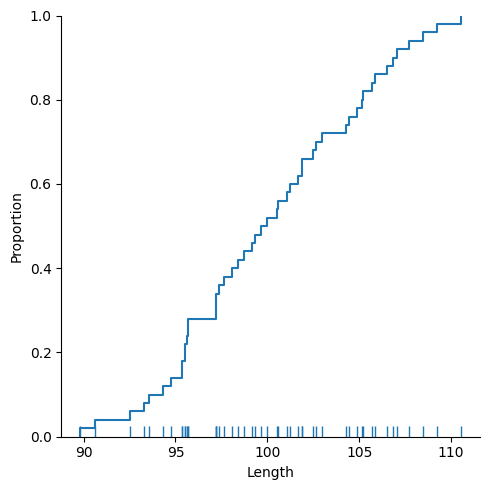

In [36]:
sns.displot(data=df, x='Length', rug=True, kind='ecdf');

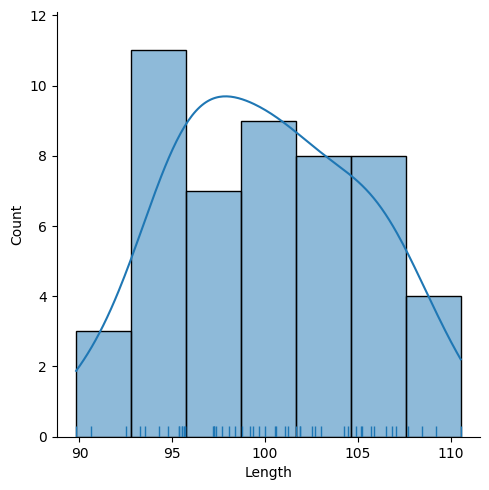

In [37]:
sns.displot(data=df, x='Length', rug=True, kde=True, kind='hist');

### Bivariate Plot

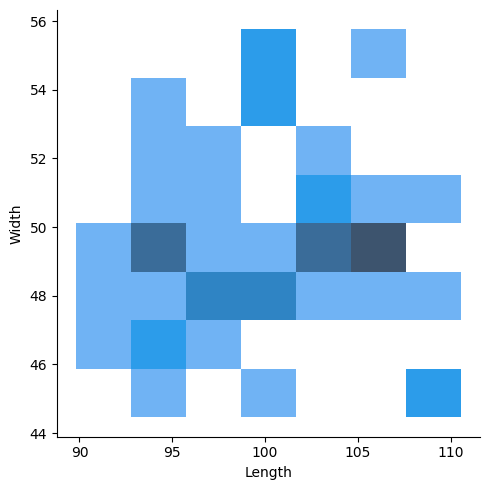

In [38]:
sns.displot(data=df, x='Length', y='Width');

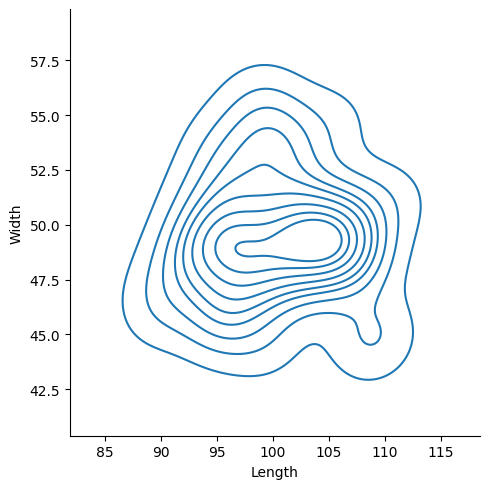

In [39]:
sns.displot(data=df, x='Length', y='Width', kind='kde');

## catplot() Category  # https://seaborn.pydata.org/tutorial/categorical.html

Categorical scatterplots:

    stripplot() (with kind="strip"; the default)

    swarmplot() (with kind="swarm")

Categorical distribution plots:

    boxplot() (with kind="box")

    violinplot() (with kind="violin")

    boxenplot() (with kind="boxen")

Categorical estimate plots:

    pointplot() (with kind="point")

    barplot() (with kind="bar")

    countplot() (with kind="count")


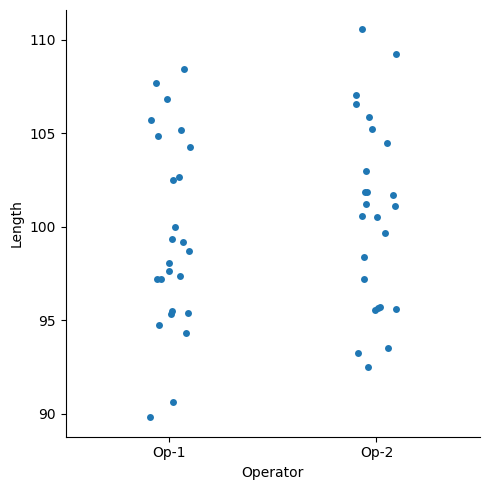

In [40]:
sns.catplot(data=df, x='Operator', y='Length');  #strip plot by default

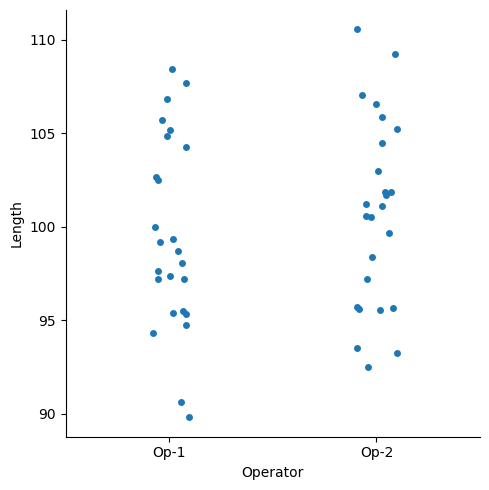

In [41]:
sns.catplot(data=df, x='Operator', y='Length', kind='strip');

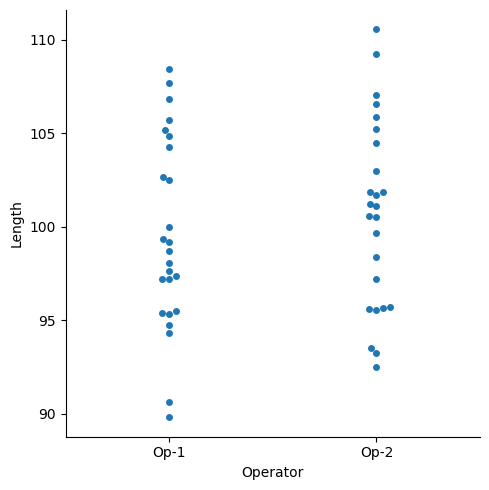

In [42]:
sns.catplot(data=df, x='Operator', y='Length', kind='swarm');

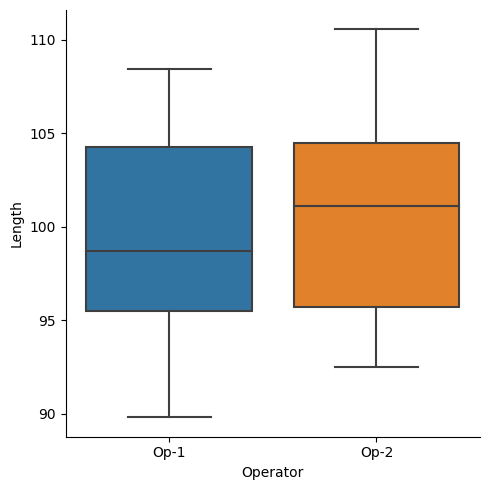

In [43]:
sns.catplot(data=df, x='Operator', y='Length', kind='box');

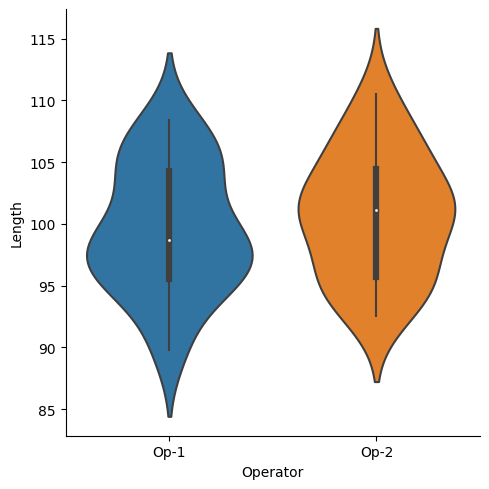

In [44]:
sns.catplot(data=df, x='Operator', y='Length', kind='violin');

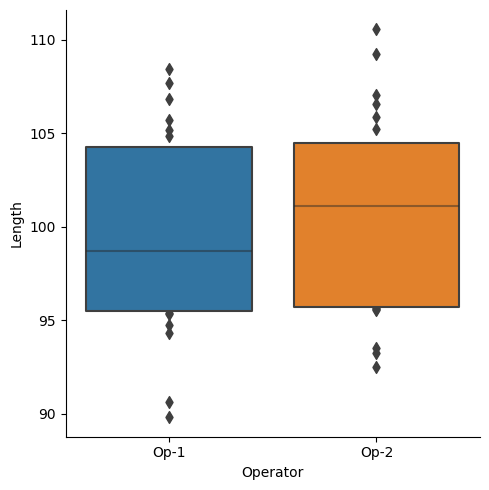

In [45]:
sns.catplot(data=df, x='Operator', y='Length', kind='boxen');

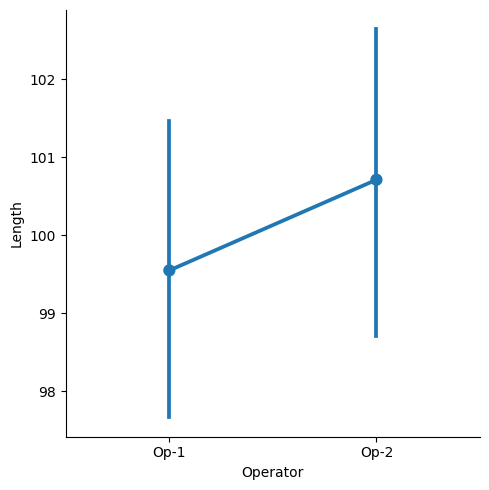

In [46]:
sns.catplot(data=df, x='Operator', y='Length', kind='point');

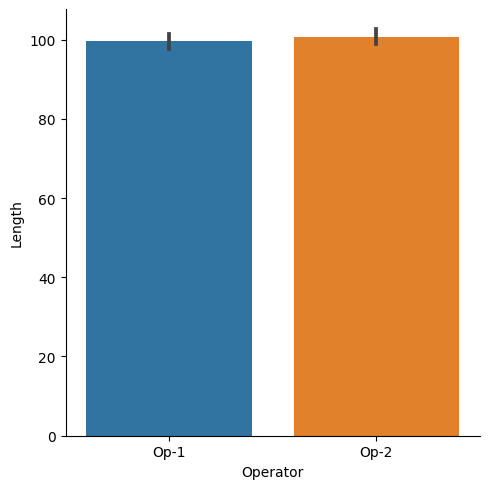

In [47]:
sns.catplot(data=df, x='Operator', y='Length', kind='bar');

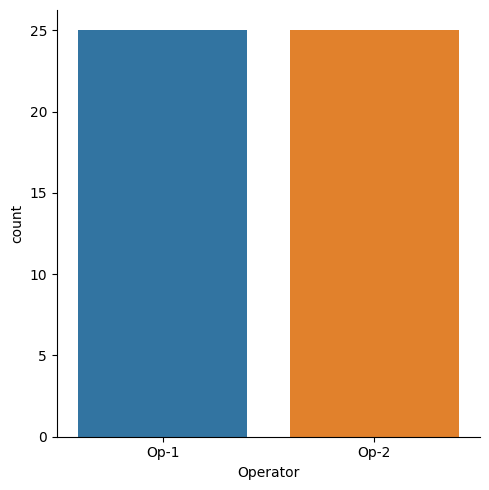

In [48]:
sns.catplot(data=df, x='Operator', kind='count');

## relplot()

scatterplot() (with kind="scatter"; the default)
lineplot() (with kind="line")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv('Piece_Dim.csv')

In [50]:
df.head()

,Item_No,Length,Width,Height,Operator
0,Item-1,102.67,49.53,19.69,Op-1
1,Item-2,102.50,51.42,19.63,Op-1
2,Item-3,95.37,52.25,21.51,Op-1
3,Item-4,94.77,49.24,18.60,Op-1
4,Item-5,104.26,47.90,19.46,Op-1


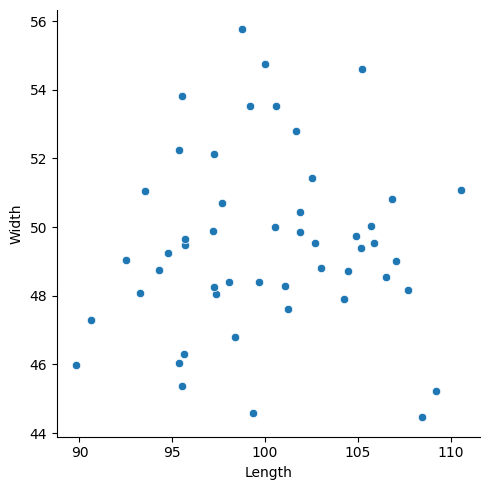

In [51]:
sns.relplot(data=df, x='Length', y='Width');  #The default kind is scatter

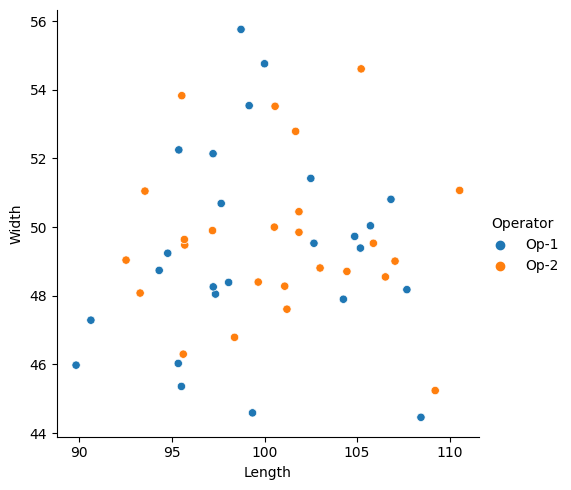

In [52]:
sns.relplot(data=df, x='Length', y='Width', hue='Operator');

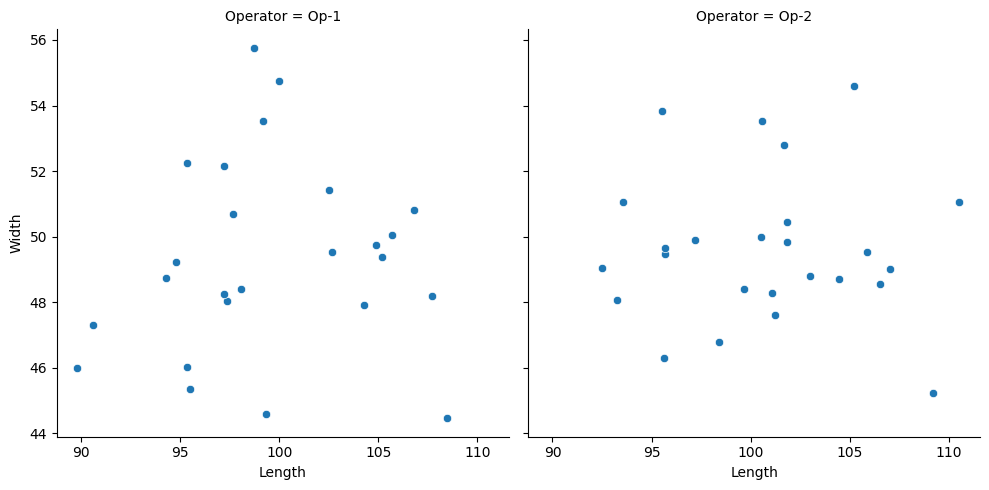

In [53]:
sns.relplot(data=df, x='Length', y='Width', col='Operator');

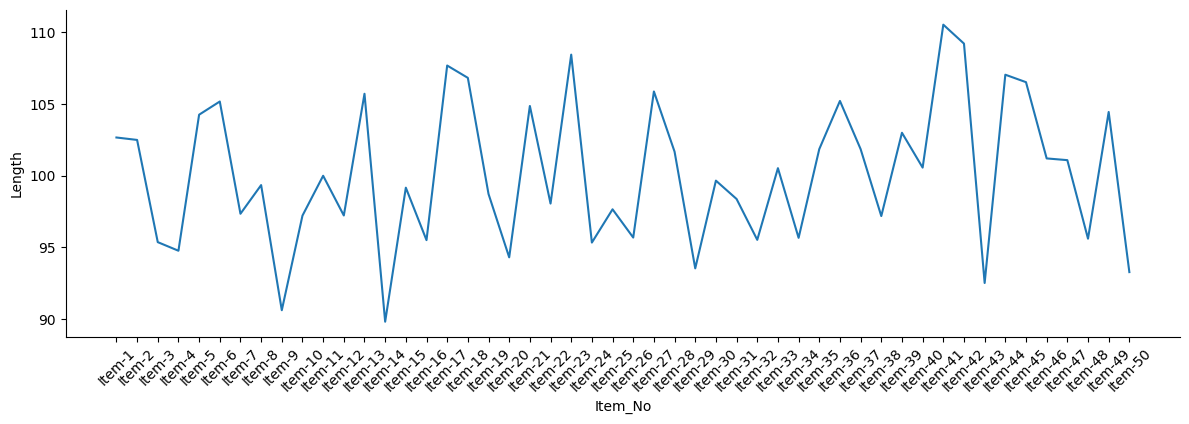

In [54]:
sns.relplot(data=df, x='Item_No', y='Length', kind='line', height = 4, aspect=3)
plt.xticks(rotation=45);

<Axes: xlabel='Length', ylabel='Width'>

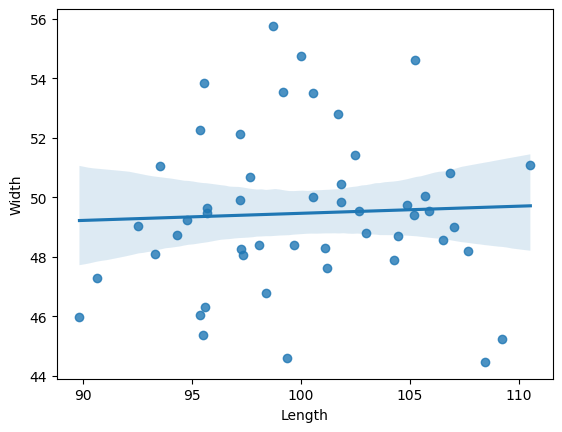

In [55]:
sns.regplot(data=df, x='Length', y='Width')

## Visualizing Titanic Dataset

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
sns.get_dataset_names()   #Available datasets with Seaborn. You need internet connection to use these.

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [58]:
titanic = sns.load_dataset("titanic")

In [59]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [60]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


from matplotlib import pyplot as plt
_df_0['survived'].plot(kind='hist', bins=20, title='survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['pclass'].plot(kind='hist', bins=20, title='pclass')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['sibsp'].plot(kind='hist', bins=20, title='sibsp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='survived', y='pclass', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='pclass', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='age', y='sibsp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='sibsp', y='parch', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['survived'].plot(kind='line', figsize=(8, 4), title='survived')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['pclass'].plot(kind='line', figsize=(8, 4), title='pclass')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['sibsp'].plot(kind='line', figsize=(8, 4), title='sibsp')
plt.gca().spines[['top', 'right']].set_visible(False)

In [61]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


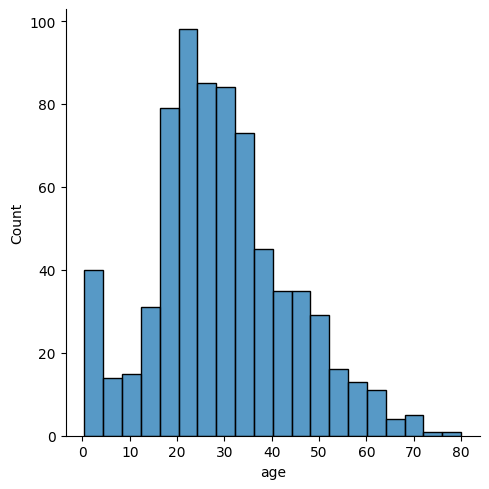

In [62]:
sns.displot(data=titanic, x='age');

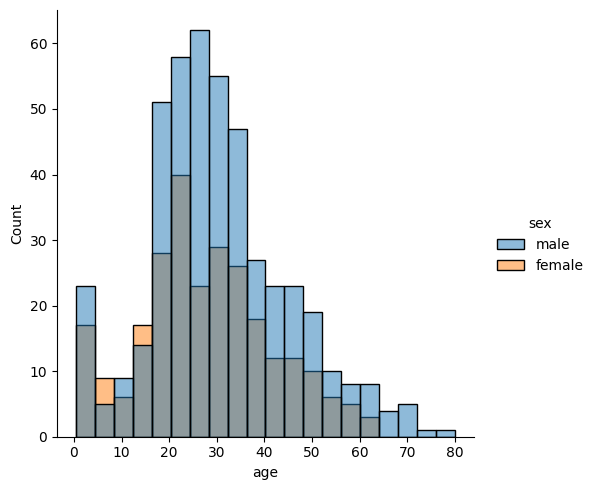

In [63]:
sns.displot(data=titanic, x='age', hue='sex');

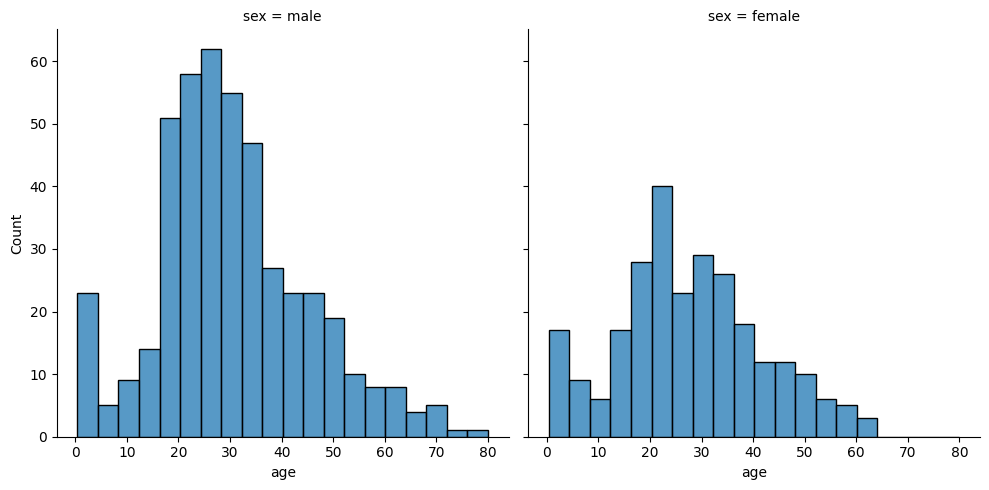

In [64]:
sns.displot(data=titanic, x='age', col='sex');

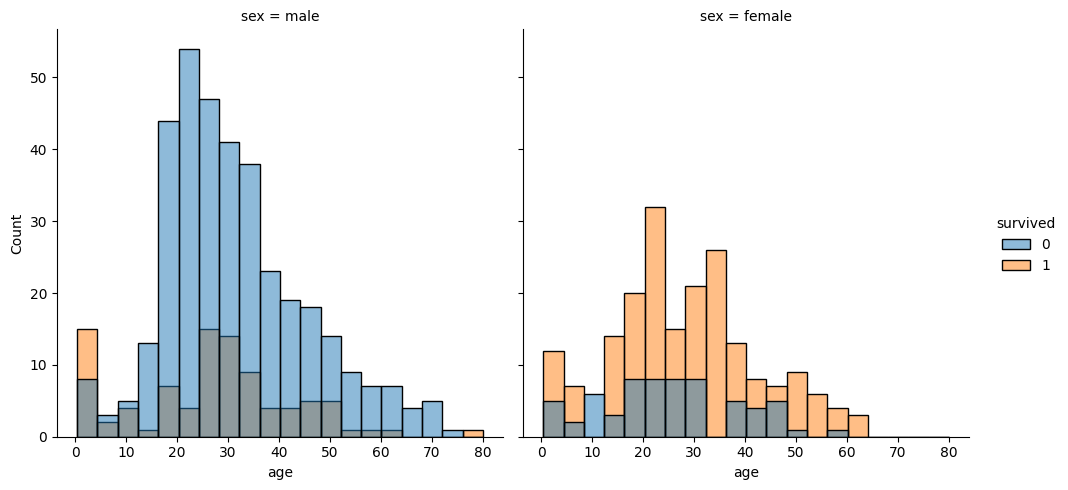

In [65]:
sns.displot(data=titanic, x='age', col='sex', hue='survived'); # Does not give a clear picture

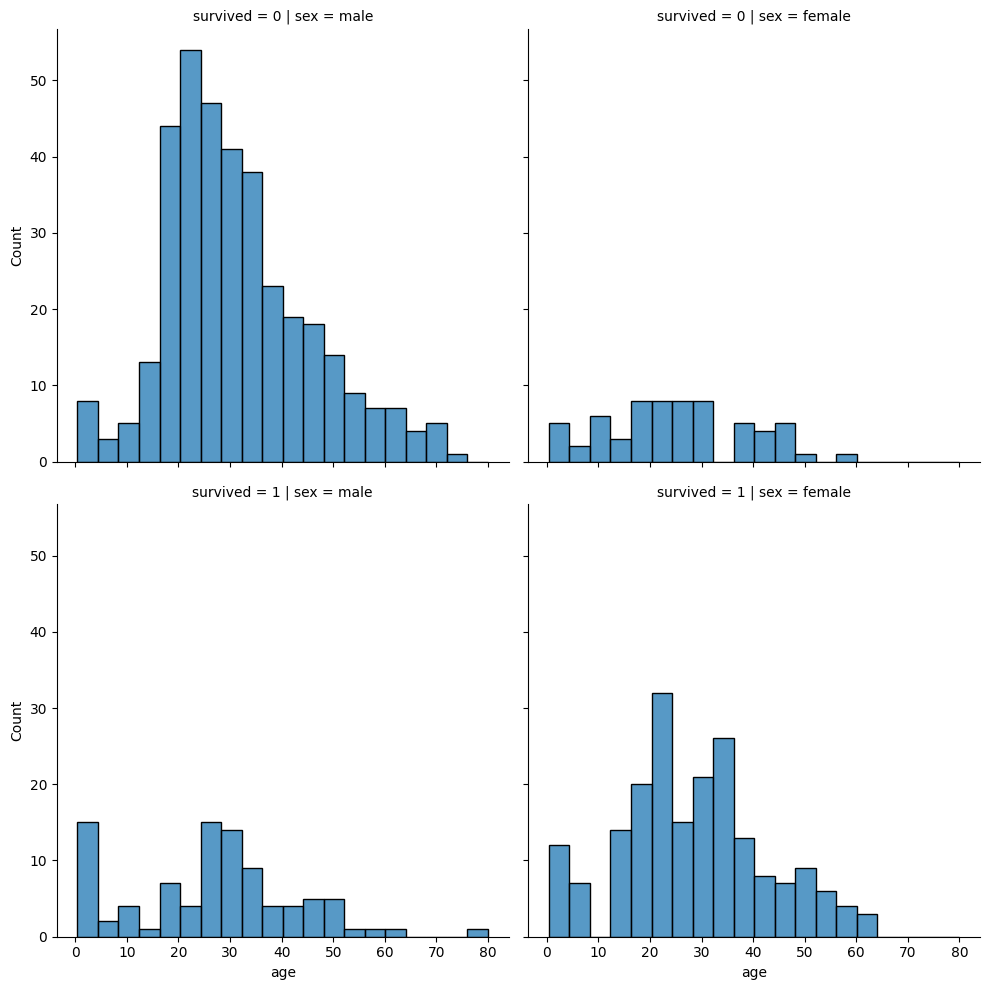

In [66]:
sns.displot(data=titanic, x='age', col='sex', row='survived');

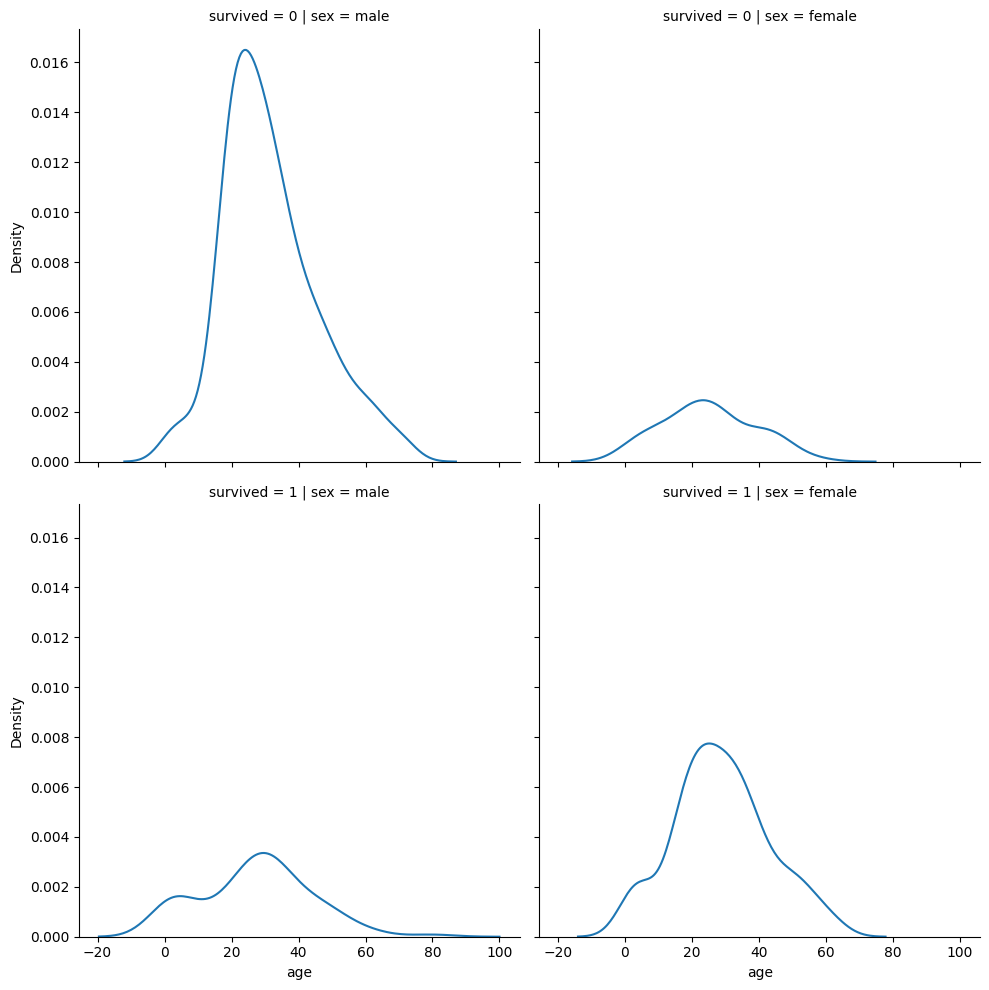

In [67]:
sns.displot(data=titanic, x='age', col='sex', row='survived', kind='kde');

### catplot()

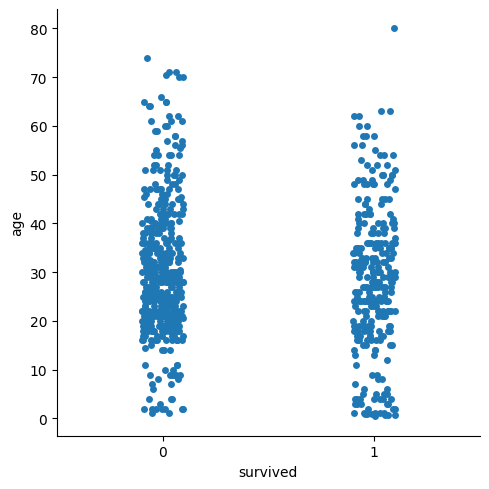

In [68]:
sns.catplot(data=titanic, x= 'survived', y='age'); # stripplot by default

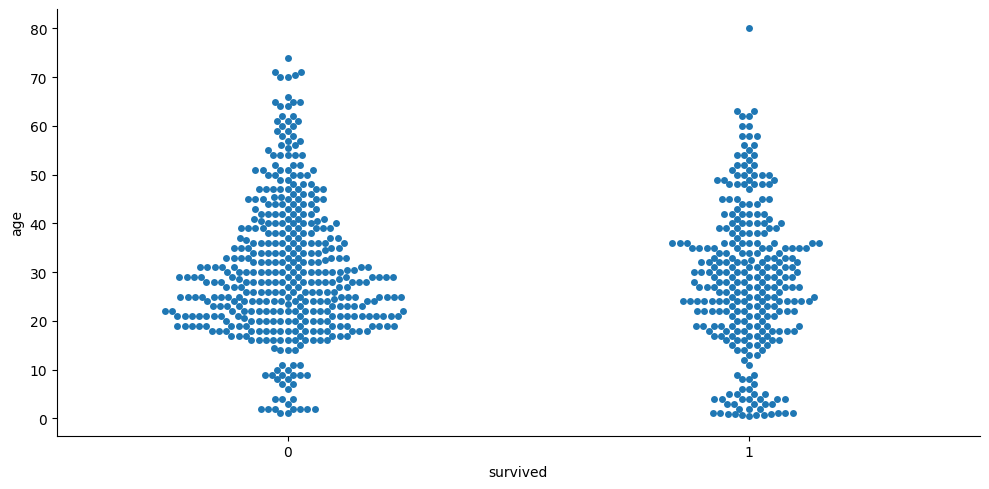

In [69]:
sns.catplot(data=titanic, x= 'survived', y='age', kind='swarm', aspect=2);
#aspect =2 to make it wide

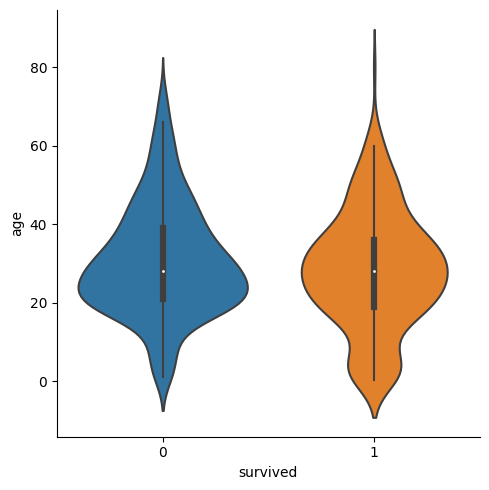

In [70]:
sns.catplot(data=titanic, x= 'survived', y='age', kind='violin');

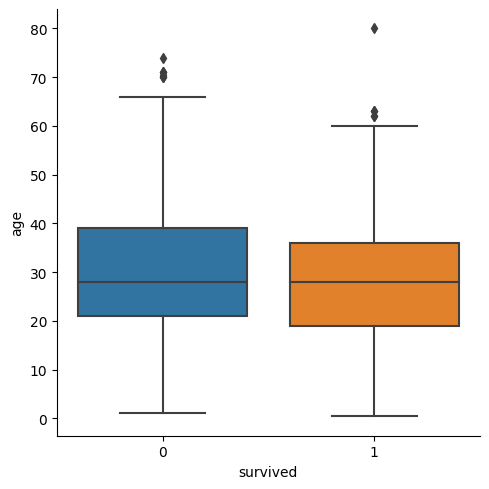

In [71]:
sns.catplot(data=titanic, x= 'survived', y='age', kind='box');

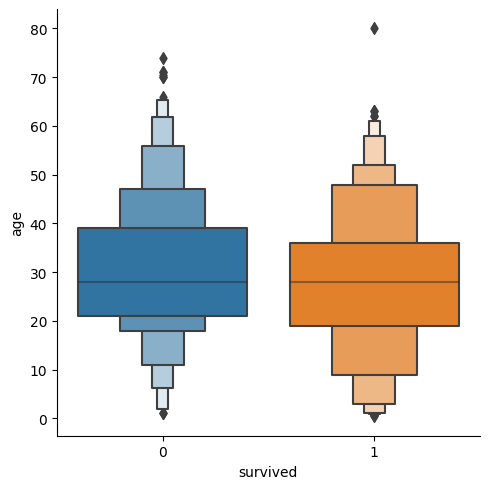

In [72]:
sns.catplot(data=titanic, x= 'survived', y='age', kind='boxen');

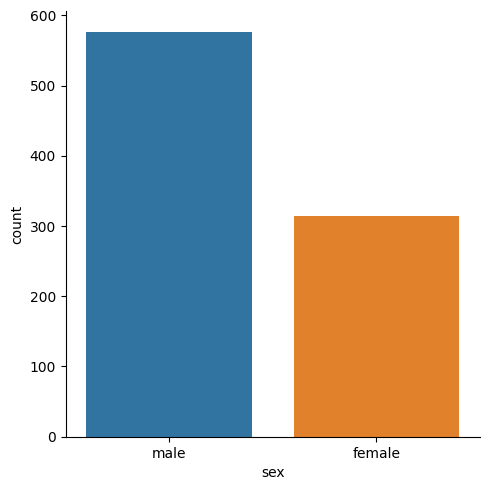

In [73]:
sns.catplot(data=titanic, x='sex', kind='count');

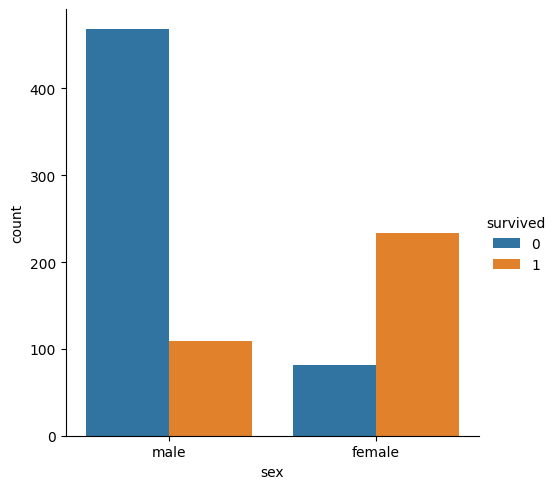

In [74]:
sns.catplot(data=titanic, x='sex', kind='count', hue='survived');

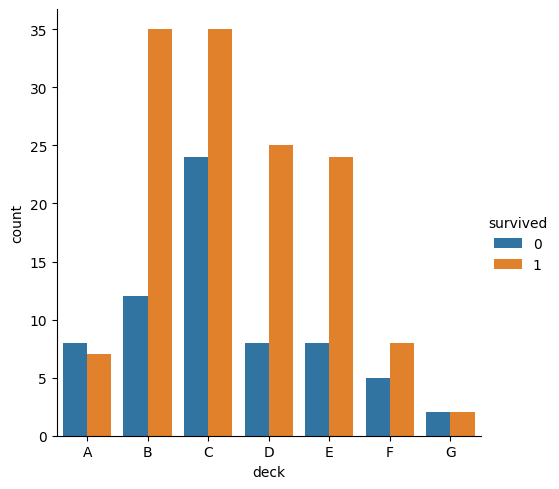

In [75]:
sns.catplot(data=titanic, x='deck', kind='count', hue='survived');